In [1]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
import string

%matplotlib inline

In [2]:
letter_string = string.ascii_lowercase

with open('data/letter.txt') as f:
    words_x, words_y, words_letters = [], [], []
    letters = []
    vectors = []
    folds = []
    ys = []
    for line in f:
        entries = line.split('\t')[:-1]
        ys.append(letter_string.index(entries[1]))
        letters.append(entries[1])
        vectors.append(np.array(entries[6:]).astype(int))
        if int(entries[2]) == -1:
            words_y.append(np.array(ys))
            words_letters.append(deepcopy(letters))
            letters = []
            folds.append(entries[5])
            words_x.append(np.array(vectors))
            vectors = []
            ys = []
folds = np.array(folds).astype(int).tolist()

In [3]:
def pad(x, y):
    maxlen = np.max([seq.shape[0] for seq in x])
    D = x[0].shape[1]
    padded_x = []
    padded_y = []
    seq_lens = []
    for seq, labels in list(zip(x, y)):
        seq_len = seq.shape[0]
        padded_seq = np.concatenate([seq, np.zeros((maxlen - seq_len, D))])[None, :, :]
        padded_labels = np.concatenate([labels, np.zeros((maxlen - seq_len))])[None, :]
        padded_x.append(padded_seq)
        padded_y.append(padded_labels)
        seq_lens.append(seq_len)
    return np.concatenate(padded_x), np.concatenate(padded_y), np.array(seq_lens)

def make_classification_data(x, y):
    x_new, y_new = [], []
    for seq, labels in list(zip(x, y)):
        x_new.append(seq)
        y_new.append(labels)
    x_new = np.concatenate(x_new)
    y_new = np.concatenate(y_new)
    return x_new, y_new

large scale

In [4]:
# x_tr, x_te, y_tr, y_te = [], [], [], []
# for fold, x, y in list(zip(folds, words_x, words_y)):
#     if fold == 9:
#         x_te.append(x)
#         y_te.append(y)
#     else:
#         x_tr.append(x)
#         y_tr.append(y)

small scale

In [5]:
x_tr, x_te, y_tr, y_te = [], [], [], []
for fold, x, y in list(zip(folds, words_x, words_y)):
    if fold == 1:
        x_te.append(x)
        y_te.append(y)
    elif fold == 0:
        x_tr.append(x)
        y_tr.append(y)

## Classification Data

In [6]:
x_tr_class, y_tr_class = make_classification_data(x_tr, y_tr)
x_te_class, y_te_class = make_classification_data(x_te, y_te)

In [7]:
np.save('data_class/x_tr', x_tr_class)
np.save('data_class/x_te', x_te_class)
np.save('data_class/y_tr', y_tr_class)
np.save('data_class/y_te', y_te_class)

## Struct Data

In [8]:
x_struct, y_struct, seq_lens = pad(words_x, words_y)

In [9]:
x_tr_struct = x_struct[np.array(folds) != 9]
x_te_struct = x_struct[np.array(folds) == 9]
y_tr_struct = y_struct[np.array(folds) != 9]
y_te_struct = y_struct[np.array(folds) == 9]
seq_lens_tr = seq_lens[np.array(folds) != 9]
seq_lens_te = seq_lens[np.array(folds) == 9]

In [10]:
np.save('data_struct/x_tr', x_tr_struct)
np.save('data_struct/x_te', x_te_struct)
np.save('data_struct/y_tr', y_tr_struct)
np.save('data_struct/y_te', y_te_struct)
np.save('data_struct/seq_lens_tr', seq_lens_tr)
np.save('data_struct/seq_lens_te', seq_lens_te)

## Pretrained embedding

In [11]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')

In [12]:
def transform(x):
    h1 = x.dot(W1) + b1[None, :]
    h1[h1 < 0] = 0
    h2 = h1.dot(W2) + b2[None, :]
    h2[h2 < 0] = 0
#     proj = h2.dot(W3)
    proj = h1.dot(W3)
    return proj

In [13]:
x_tr_new = transform(x_tr_class)

In [14]:
letter_string = string.ascii_lowercase
letter_features = {}
for i, letter in enumerate(letter_string):
    cur_arr = x_tr_new[y_tr_class == i, :]
    letter_features[letter] = cur_arr
    

In [17]:
letter_arr.shape

(386, 6)

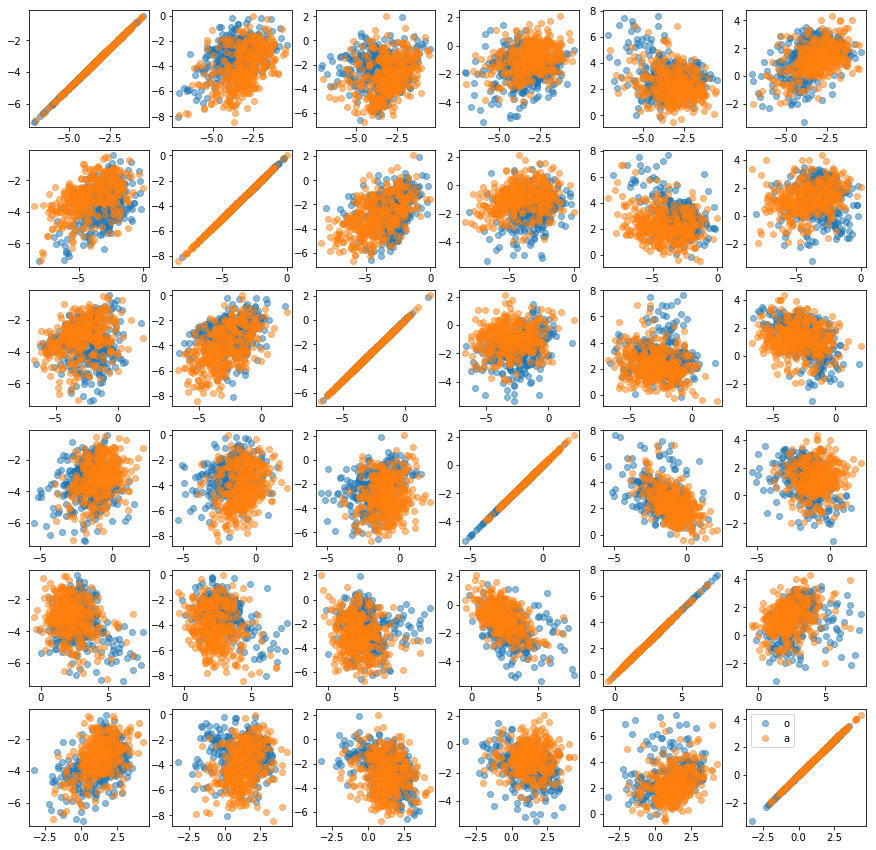

In [18]:
fig, arr = plt.subplots(6, 6, figsize=(15, 15))
for letter in 'oa':
    letter_arr = letter_features[letter]
    for i in range(6):
        for j in range(6):
            arr[i, j].plot(letter_arr[:, i], letter_arr[:, j], 'o', label=letter, alpha=0.5)

plt.legend()


In [19]:
words_transformed = [transform(word) for word in words_x]

In [23]:
np.unique(y_te_struct)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.])

In [26]:
x_struct, y_struct, seq_lens = pad(words_transformed, words_y)

In [32]:
x_tr_struct = x_struct[np.array(folds) == 0]
x_te_struct = x_struct[np.array(folds) == 1]
y_tr_struct = y_struct[np.array(folds) == 0]
y_te_struct = y_struct[np.array(folds) == 1]
seq_lens_tr = seq_lens[np.array(folds) == 0]
seq_lens_te = seq_lens[np.array(folds) == 1]

In [36]:
np.save('data_struct/x_tr', x_tr_struct)
np.save('data_struct/x_te', x_te_struct)
np.save('data_struct/y_tr', y_tr_struct)
np.save('data_struct/y_te', y_te_struct)
np.save('data_struct/seq_lens_tr', seq_lens_tr)
np.save('data_struct/seq_lens_te', seq_lens_te)